# **Data Loading and Overview**
## **Loading Data from Google Drive and Displaying Overview**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Accessing the data from the Google Drive links
customers_link = "https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_link = "https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_link = "https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

# Loading the data directly into pandas DataFrames
customers = pd.read_csv(customers_link)
products = pd.read_csv(products_link)
transactions = pd.read_csv(transactions_link)

# Checking the structure of the data
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [3]:
#checking for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
#checking for duplicate values
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [5]:
# Checking the data types of each column in the 'customers' DataFrame
print(customers.dtypes)


CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [6]:
# Converting the 'SignupDate' column to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [7]:
# Converting the 'TransactionDate' column in the 'transactions' DataFrame to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [8]:
# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [9]:
# Counting the unique customers, products, and total transactions
print("Number of unique customers:", customers['CustomerID'].nunique())
print("Number of unique products:", products['ProductID'].nunique())
print("Number of transactions:", transactions.shape[0])


Number of unique customers: 200
Number of unique products: 100
Number of transactions: 1000


# **Insight 1: Revenue by Product Category**


In [10]:
# Grouping the transactions by product category to calculate the total revenue
category_revenue = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
category_revenue = category_revenue.merge(products[['ProductID', 'Category']], on='ProductID')
category_revenue = category_revenue.groupby('Category')['TotalValue'].sum().reset_index()

# Creating a bar plot for revenue by product category
import plotly.express as px
fig = px.bar(category_revenue, x='Category', y='TotalValue', title='Revenue by Product Category', text='TotalValue')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()



- The analysis of revenue by product category reveals that the **"Books"** category generates the highest revenue (\$190k), followed by **"Electronics"** (\$180k), **"Clothing"** (\$170k), and **"Home Decor"** (\$150k).
- This indicates that **Books** and **Electronics** are key revenue drivers, while **Home Decor** has relatively lower performance.
- Businesses should focus on leveraging the popularity of **Books** and **Electronics** while exploring strategies to boost sales in **Home Decor**.


# **Insight 2: Top-Selling Products**


In [11]:
# Aggregating the total quantity sold for each product
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID')
product_sales = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Creating a horizontal bar plot for the top-selling products
fig = px.bar(product_sales, x='Quantity', y='ProductName', orientation='h', title='Top-Selling Products', text='Quantity')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()



- The top-selling products by quantity include **"SoundWave Jeans"** and **"SoundWave Cookbook"**, each with **46 units sold**, followed closely by **"TechPro Headphones"** (**45 units**) and **"ActiveWear Rug"** (**43 units**).
- Products like **"HomeSense Desk Lamp"** and **"ActiveWear Smartphone"** also show significant sales, indicating a diverse set of high-demand items across different categories.
- This highlights a balanced mix of product categories driving sales, suggesting that businesses should maintain optimal inventory levels for these popular products to meet demand efficiently and avoid stockouts.


# **Insight 3: Customer Distribution by Region**


In [12]:
# Counting the number of customers by region
region_distribution = customers['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Count']

# Creating a pie chart for customer distribution by region
fig = px.pie(region_distribution, names='Region', values='Count', title='Customer Distribution by Region')
fig.show()



- The customer base is distributed across four regions, with the highest percentage in **South America** (**29.5%**), followed by **Europe** (**25%**), **North America** (**23%**), and **Asia** (**22.5%**).
- This suggests **South America** as the largest market, but other regions also contribute significantly to the overall customer base.
- Businesses can focus on regional marketing strategies to address customer preferences and expand in less dominant regions like **Asia** and **North America**, where growth potential may be higher.


# **Insight 4: Monthly Revenue Trends**


In [13]:
# Extracting the month and year from 'TransactionDate' for grouping by month
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Calculating total revenue for each month
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Converting 'Month' from Period type to string for compatibility with Plotly
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Plotting the monthly revenue trends using Plotly
fig = px.line(
    monthly_revenue, 
    x='Month', 
    y='TotalValue', 
    title='Monthly Revenue Trends', 
    markers=True
)
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    template='plotly_white'  # Optional: Enhances the plot aesthetics
)
fig.show()



- The line graph depicts **monthly revenue trends** from **January 2024 to November 2024**.
- **Revenue** saw a significant surge in **January**, followed by a decline and then fluctuating growth throughout the year.
- Notably, there was a peak in **July** and a subsequent dip in **November**.
- This indicates that January might be a strong sales month, potentially due to seasonal factors, while July sees a mid-year boost. November, on the other hand, shows a decline, which could signal a need for end-of-year strategies to sustain growth.


# **Insight 5: Identifying Customer Loyalty and Product Success**

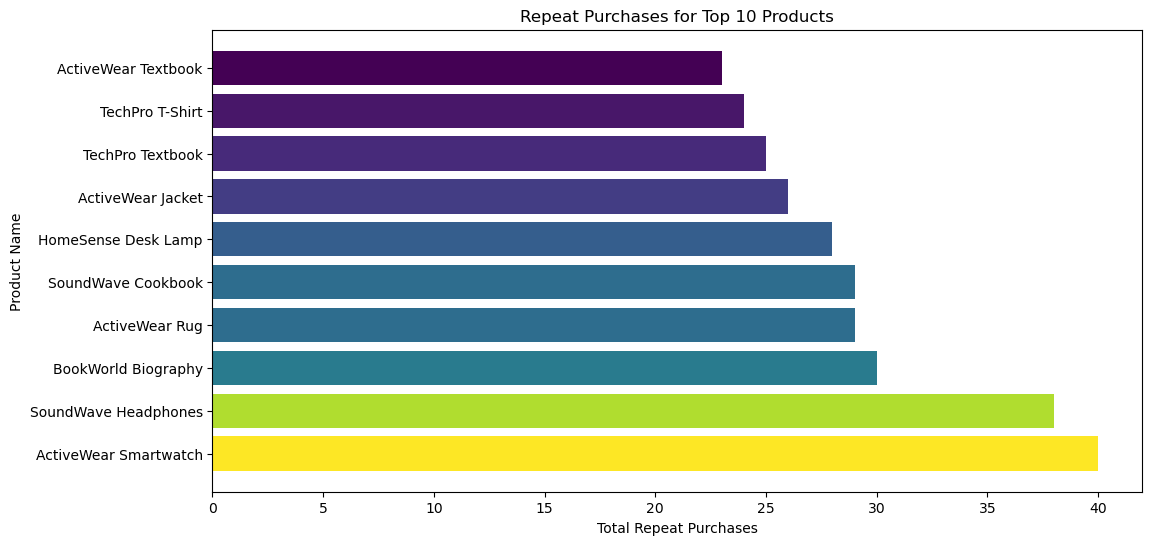

In [14]:
import matplotlib.cm as cm  # Importing colormap for the plot

# Grouped the data by ProductName and CustomerID to count repeat purchases
product_repeat_summary = merged_data.groupby(['ProductName', 'CustomerID']).size().reset_index(name='RepeatPurchases')

# Extracted the top 10 products based on total repeat purchases
top_10_products = product_repeat_summary.groupby('ProductName')['RepeatPurchases'].sum().nlargest(10)

# Normalized the 'RepeatPurchases' column for color mapping
norm = plt.Normalize(top_10_products.min(), top_10_products.max())
cmap = cm.viridis  # Selecting the colormap for visualization

# Applied color mapping based on repeat purchases
top_10_products_df = top_10_products.reset_index()
top_10_products_df['Color'] = [cmap(norm(value)) for value in top_10_products_df['RepeatPurchases']]

# Created a horizontal bar plot for the top 10 products with color-coded bars
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_products_df['ProductName'], top_10_products_df['RepeatPurchases'], 
                color=top_10_products_df['Color'])

# Added the title and labels to the plot
plt.title('Repeat Purchases for Top 10 Products')
plt.xlabel('Total Repeat Purchases')
plt.ylabel('Product Name')

# Displayed the plot
plt.show()



- The bar chart illustrates the **repeat purchase frequency** for the **top 10 products**.
- **ActiveWear Smartwatch** and **SoundWave Headphones** exhibit the highest repeat purchase rates, suggesting **strong customer satisfaction** and **loyalty**.
- In contrast, products like **BookWorld Biography** and **ActiveWear Rug** have lower repeat purchases, suggesting potential areas for improvement in **product design** or **marketing strategies**.
- Analyzing **customer demographics** and preferences for products with high repeat purchase rates could provide valuable insights for **inventory management**, **marketing campaigns**, and **product development**.


# **Insight 6: Correlation Analysis Between Quantity, Total Value, and Price**


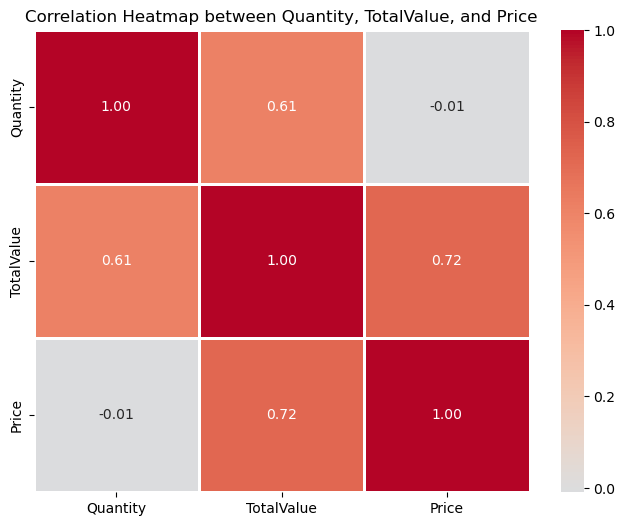

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns
heatmap_data = transactions[['Quantity', 'TotalValue', 'Price']]

# Computing correlation matrix
correlation_matrix = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt='.2f', cbar=True)

# Adding title
plt.title('Correlation Heatmap between Quantity, TotalValue, and Price')

# Show plot
plt.show()


- **Quantity** and **TotalValue**: **Strong positive correlation** (0.61). This means that as the quantity of items purchased increases, the total value of the transaction tends to increase as well.
- **TotalValue** and **Price**: **High positive correlation** (0.72). This indicates that higher-priced items generally result in **higher total transaction values**.
- **Quantity** and **Price**: **Weak correlation** (-0.01). This suggests that the quantity of items purchased is not significantly influenced by the price of individual items.
